### Random Forest

- Random Forest is ML algorithm widely used in both Regression and classfication problem.
- It builds Decision Tree on diffrent samples and take majority vote in case for Classification and Mean in case of Regression.
- Random Forest uses ensemable technique it means running multiple models on same dataset.

- Bagging (Bootstrap Agggregating)
- Boosting

- Decision Tree may impacted by irrelevant feature and noisy data and model will get overfitted and in case of imbalanced data it will work properly.

##### Bagging

- In Decision Tree the model may get overfitted because of irrelevant feature and Noisy data. 
- To reduce this problem we have bagging technique. In Bagging instead of giving complete dataset we give the subset of dataset to weak leanerrs.Generally we use Decision Tree Classifier ; we can also called it as leaners.
- In RF,because of creation of different subset models the data may get pick randomly hence there's very less chances of Overfitting.
- The sample data given to the DT classifier there's chances of the data given to the model_1 may get repeat in model_2. To avoid this problem we use columns sampling and row sampling. 
- In col sampling suppose we have 10 features, then 5 features given model_1 and 3 features given to the model_2 and 2 features given to the model_3. and in case of Row sampling selects randomly samples repeatedly with replacement and fit tress to these.
- For col sampling (Low variance) and For row sampling (Low Bias)
- At the end , the result of different samples take their majority vote for classification and Mean in case of Regression.

##### Boosting

- Boosting is ensemble modeling technique that attempt to built strong classfier from No. of weak leaners.
- By default the Wt.is assigned to the data points. It follows sequential train; the sample data given to th weak leaners. For correctly predicted data it will keep the result as it is but for incorretly predicted data it will assign to its increased Wt. beacuase of increase Wt. there's chances of this data point may get pick in model_2 and this process may get repeat until untire will get train.
- Wt. is assigned to rows

### Cross Validation and Hyper Parameter Tunning

#### Cross Validation

- In ML,We couldn't fit the model on the training data and can't say that the model will work accurate for real data. We must be assure that our model got the correct patteren from the data and it is not getting uo too much noise.For this purpose we use the cross validation.
- The main purpose of cross validation is to prevent Overfitting. Which is occures a model is trained too well on training data and performs poorly on unseen data.
- The cross validation is a technique used to evaluate the performace the model on unseen data.In cross validation we divide available data into multiple folds or subset, using one of these folds as validation set and train the model on remaining folds.This process is repeated multiple times. each time using a diffrent folds as validation set, finally the result of each validation step are avaraged.

#### Hyper Parameter Tunning

- The parameter at which our model gives max accuracy.
- No.of parameters that need to be leanerd from data by training a model with existing data, we are able to fit the model parameters known as Hyper Parameters.
- The two best strategies for hyper parameters tunning.

###### a.GridsearchCV
###### b.RandomizedCV

##### a.GridsearchCV

- We try every combination of a present list of values of the hyper parameters and choose the best combination based on the cross validation score.
- GridsearchCV takes lot of time to fit because it will try all the combinations.

##### b.RandomizedCV

- RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long. 
- Randomly it will picks the hyper parameters and give results best parameters.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\tsd95\CSV Files\Model\IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
t = df[[col for col in df.columns if col in ['species']]]
t.head()

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [7]:
t['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [8]:
ob = LabelEncoder()

In [9]:
ob.fit_transform(t)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
df = pd.concat([df,pd.DataFrame(ob.transform(t),columns=['en_species'])],axis=1)
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,en_species
97,6.2,2.9,4.3,1.3,Iris-versicolor,1
80,5.5,2.4,3.8,1.1,Iris-versicolor,1
53,5.5,2.3,4.0,1.3,Iris-versicolor,1
136,6.3,3.4,5.6,2.4,Iris-virginica,2
26,5.0,3.4,1.6,0.4,Iris-setosa,0


In [11]:
df.drop('species',axis=1,inplace=True)
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,en_species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


<Figure size 1000x600 with 0 Axes>

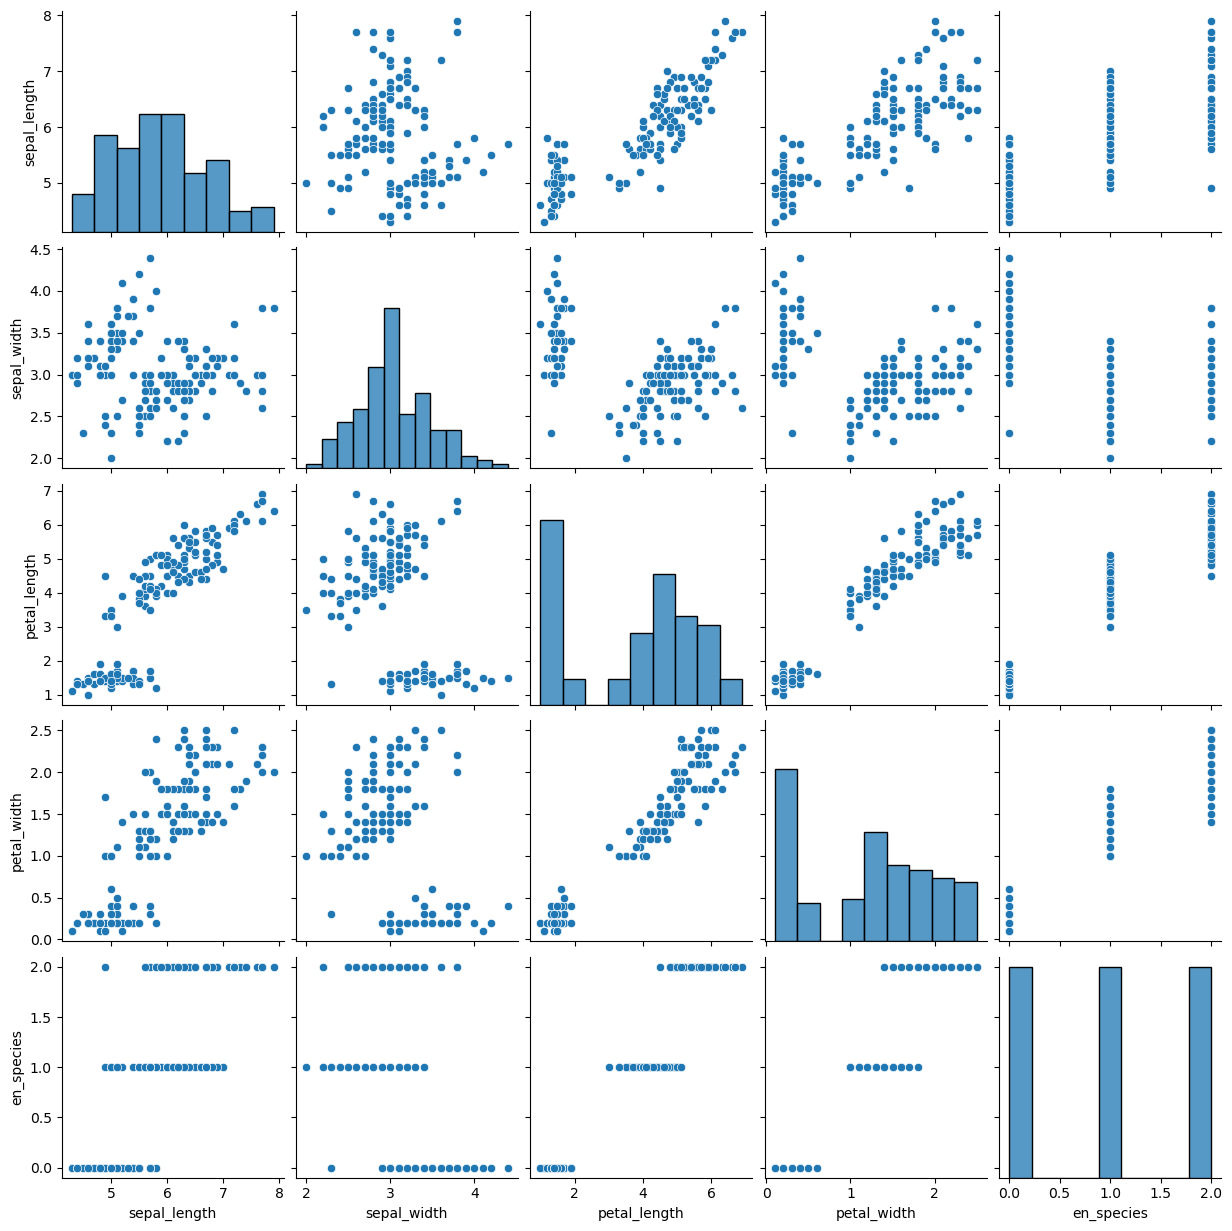

In [12]:
plt.figure(figsize=(10,6))
sns.pairplot(data=df)

In [13]:
X = df[[col for col in df.columns if col not in ['en_species']]]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y = df[[col for col in df.columns if col in ['en_species']]]
y.head()

,en_species
0,0
1,0
2,0
3,0
4,0


In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [16]:
print('Size_of X_train',X_train.shape)
print('Size_of X_test',X_test.shape)
print('Size_of y_train',y_train.shape)
print('Size_of y_test',y_test.shape)

Size_of X_train (105, 4)
Size_of X_test (45, 4)
Size_of y_train (105, 1)
Size_of y_test (45, 1)


In [17]:
rf = RandomForestClassifier()

In [18]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [19]:
yPred = rf.predict(X_test)

In [20]:
yPred

array([1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       1, 0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1,
       2])

In [21]:
print(classification_report(y_test,yPred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.89      1.00      0.94        16
           2       1.00      0.89      0.94        18

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [22]:
cm = confusion_matrix(y_test,yPred)
cm

array([[11,  0,  0],
       [ 0, 16,  0],
       [ 0,  2, 16]], dtype=int64)

###### By Changing Parameter

In [23]:
rf_model = RandomForestClassifier()

hyper = {
    'n_estimators':[500,350,200,100,50],
    'criterion':['gini','entropy'],
    'max_depth': np.arange(4,8)
        }

In [24]:
gridsearchCV = GridSearchCV(rf_model,param_grid=hyper,cv=10)

In [25]:
gridsearchCV.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([4, 5, 6, 7]),
                         'n_estimators': [500, 350, 200, 100, 50]})

In [26]:
gridsearchCV.best_params_

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 500}

In [27]:
rf_grid = RandomForestClassifier(criterion= 'entropy', max_depth = 4, n_estimators= 100) 

In [28]:
rf_model = rf_grid.fit(X_train,y_train)

In [29]:
yPred_grid = rf_model.predict(X_test)
yPred_grid

array([1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       1, 0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1,
       2])

In [30]:
cm_grid = confusion_matrix(y_test,yPred_grid)
cm_grid

array([[11,  0,  0],
       [ 0, 16,  0],
       [ 0,  2, 16]], dtype=int64)

In [31]:
print(classification_report(y_test,yPred_grid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.89      1.00      0.94        16
           2       1.00      0.89      0.94        18

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [32]:
rf_random = RandomForestClassifier()

hyper_random = {
    'n_estimators':[500,350,200,100,50],
    'criterion':['gini','entropy'],
    'max_depth': np.arange(4,8)
        }

In [33]:
rf_random_para = RandomizedSearchCV(rf_random,param_distributions=hyper_random,cv=15)

In [34]:
rf_random_para.fit(X_train,y_train)

RandomizedSearchCV(cv=15, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([4, 5, 6, 7]),
                                        'n_estimators': [500, 350, 200, 100,
                                                         50]})

In [35]:
rf_random_para.best_params_

{'n_estimators': 50, 'max_depth': 6, 'criterion': 'entropy'}

In [36]:
rf_random_model = RandomForestClassifier(n_estimators= 50, max_depth=5, criterion='gini')

In [37]:
rf_random_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [38]:
yPred_random = rf_random_model.predict(X_test)

In [39]:
yPred_random

array([1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       1, 0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1,
       2])

In [40]:
cm = confusion_matrix(y_test,yPred_random)
cm

array([[11,  0,  0],
       [ 0, 16,  0],
       [ 0,  2, 16]], dtype=int64)

In [41]:
print(classification_report(y_test,yPred_random))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.89      1.00      0.94        16
           2       1.00      0.89      0.94        18

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

